# AEquity: A Deep Learning Based Metric for Detecting, Characterizing and Mitigating Dataset Bias

## Introduction

Today, I'll be demonstrating AEquity. AEquity is a A Deep Learning Based Metric for Detecting, Characterizing and Mitigating Dataset Bias. Below, we show a schematic representation of bias in healthcare. Systemic biases are often replicated into dataset bias. When models are trained on biased datasets, they produced biased predictions. These predictions can recapitulate and perpetuate systemic biases against underserved populations. There are currently two main solutions in practice - Post-hoc technical solutions, and Grassroots Interventions. Post Hoc technical solutions do not work well because they are unable to overcome biased data used to train algorithms, resulting in a trade off between sensitivity and specificity, or group performance and generalizability. Grassroots Interventions are another solution that targets systemic biases, however, these interventions require long-standing changings such as anti-racist policies and patient provider education that take time to implement. A more data-centric approach may help address bias earlier in the process of development of algorithms, while operating on a quicker time scale. We present AEquity (AEq), a sample-efficient deep-learning based metric, that targets dataset bias by measuring the learnability of subsets of data representing underserved populations. Subsequently, we can recommend bias mitigation measures such as collecting more relevant data and selecting more informative outcomes.

<div>
<img src="./img/Figure-1.png" width="700"/>
</div>

## Core concepts behind AEquity



**AEquity pipeline in practice.** 

In part A, we show what an ideal dataset might look like. The gray folders represent a single group of individuals, which translates into relatively homogenous input features, and the red and green outlines represent the labels of the dataset. However, most datasets appear like the figure B. In figure B, we have more than one group, represented by the gray and yellow colored folders. When a model is trained on a dataset consisting on individuals from the gray and yellow groups, there may be a different generalization performance in each group. This different generalization performance is how we define bias. 

In part C, we show how we can use AEq to capture these biases and intervene upon a dataset. AEq calculates a specific value, which has the unit of log(n) samples, with respect to each group and label. Based on these AEq values, we can intervene on the dataset. The two interventions depicted in part D are choosing a more informative label, depicted by switching the outline from red and green to blue and orange, and adding more relevant samples, which we depict as adding a yellow folder. This leads to an improvement in generalizability for the under-represented group. 

<div>
<img src="./img/Figure-2.png" width="700"/>
</div>



**(A)** The red and green outlines represent the labels. The gray represents a relatively homogenous group. A model is trained on what is thought to be a standard dataset and appears to perform well. 

**(B)** The red and green outlines represent different labels, while the gray represents the over-represented group while yellow represents the under-represented group. When naively trained in a similar manner on a more diverse dataset, the resulting model is biased because it performs worse for a particular group, because of systematic biases reflected in the data. 

**(C)** Application of AEquity enables disentanglement of dataset-level roots of the resulting bias. AEq is applied directly to the dataset and can generate values for each group and label. 

**(D)** Actionable feedback from AEquity reduces bias by improving performance for the disadvantaged group. Two types of actionable feedback are depicted – the blue and orange borders represent the selection of more informative labels. Second, the yellow and gray samples added to the dataset highlight a targeted dataset collection.

## Application of AEq to Social and Predictive Biases


In a seminal paper published in *Science*, Obermeyer et al showed that racial bias in cost-predictive algorithms can propagate systemic forms of inequity in healthcare resource allocation. When using cost as the risk-derived metric, Black patients at a given risk score were considerably sicker than their white counterparts. This bias arises because the algorithm predicts health care costs rather than illness, but unequal access to care results in far less money being spent on care for Black patients, even when they are significantly sicker. Post-hoc modifications fail for this example: this bias arises despite using calibration-based fairness metrics and is invariant to including an indicator variable for “race.” Thus, traditional metrics are insufficient to capture the bias. **On switching from a cost-based metric to one that utilizes comorbidities, however, the algorithm was able to mitigate some of the bias.** The remaining bias was determined to be a form of mislabeling, or label bias.

In this demonstration, we show how we can use AEq to arrive at the same conclusions. However, we can arrive at these conclusions at a sample efficiency of almost *300*. Second, we show how we can use AEq to take concrete steps to mitigate this form of bias from occuring in the future. 

<div>
<img src="./img/Figure-5.png" width="700"/>
</div>

## Understanding the types of bias

AEq can measure three types of bias - sampling bias, complexity bias, and label bias. 

First, lets discuss how AEq works, and then we can talk about how AEq measures each kind of bias. In this prototypical example, we have a dataset consisting of two groups. Group 1 is colored blue, Group 2 is colored red. AEq measures the learnability of a given group. 

For example, if a group has relatively few informative features and is relatively homogenous, it will have. a lower AEq. However, if a group has more informative features and is heterogenous, it generally will have a higher AEq. A lower AEq means that it is easier to generalize to a given group and a higher AEq, means that it will be harder to generalize. 

Now, lets discuss the types of bias. 

1. Sampling Bias   - **Joint AEq < AEq for either group**.  Here, In group 1, the samples are drawn at lower frequencies, and subsequently each label in the group has a higher AEq value. In group 2, the class labels at are drawn at higher frequencies and have lower AEq values. Higher frequency of sampling resulted in easier generalization, and therefore lower AEq values. When sampling bias was the only type of dataset bias, combining groups drives the AEq value closer to the over-sampled data. Sampling bias is primarily driven by data availability – in dermatology datasets, for example, lighter-skinned populations are generally more represented and therefore have better generalizability that darker-skinned populations.

2. Complexity Bias - **Joint AEq > AEq for either group**. Complexity bias was characterized as different groups representing different distributions across the same label. When complexity bias is the only type of dataset bias, combining the groups resulted either in an increase in the value of AEq or an AEq closer to value that had been higher prior to the combination. For example, Hispanic patients with rheumatoid arthritis tend to have a delayed initial presentation to a rheumatologist, and therefore have a greater range of manifestations and severity. As a result, Hispanic individuals present more heterogeneously with rheumatoid arthritis than their counterparts, which makes diagnosis more difficult

3. Label Bias - **AEqs are equal between groups**. Labels are not dependent on underlying data complexity. AEqs between groups will be relatively similar during label bias because AEq is relatively label-agnostic. This is often a diagnosis of exclusion - residual bias that leads to differences in generalization despite similar group characterstics must be explained by differences in labelling patterns. Label bias occurs when labels are placed incorrectly at different rates for different groups and can lead to increased misclassification errors for the affected group. For example, Black patients are incorrectly labeled as requiring fewer healthcare resources despite having the same number of comorbidities because of lack of access to care 

<div>
<img src="./img/Figure-3-V2.png" width="700"/>
</div>

### Inspecting the Dataset

I know that was a long intro, but now that we know how to use the tool, using it is going to be a piece of cake. Lets begin by importing and inspecting the data from the Obermeyer paper!

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
sns.set_theme(style="white", palette=None)

In [3]:
df = pd.read_csv("./preprocssed_demo.tsv", sep="\t")

As you can see, we have a range of different demographic factors, as well as risk scores for features such as alcohol use disorder, anemia, hyperlipidemia, and medications. At the end, we have the columns for the outcomes that we will compare. The first outcome is GAGNE score, which is a measure of commorobidites. Second outcome, is the $log(cost)$ in a given year t. These have already been stratified into high and low-risk categories, where 0 is low risk and 1 is high risk. 

In [4]:
df.head()

,dem_female,dem_age_band_18-24_tm1,dem_age_band_25-34_tm1,dem_age_band_35-44_tm1,dem_age_band_45-54_tm1,dem_age_band_55-64_tm1,dem_age_band_65-74_tm1,dem_age_band_75+_tm1,alcohol_elixhauser_tm1,anemia_elixhauser_tm1,...,trig_max-high_tm1,trig_max-normal_tm1,lasix_dose_count_tm1,lasix_min_daily_dose_tm1,lasix_mean_daily_dose_tm1,lasix_max_daily_dose_tm1,log_cost_t,gagne_sum_t,log_cost_avoidable_t,demographics
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


Here, we conduct a simple exploratory data analysis, and we see that the dataset is imbalanced for white patients over black patients and females over males. We will primarily focus on comparing the AEq values for black and white patients, but this tool can be used for any demographic and for intersectional identities, which are often at an even greater risk for systemic biases.

In [7]:
summmary_demographics = pd.DataFrame(df.groupby(['demographics', 'dem_female']).size())
summmary_demographics.reset_index(inplace=True)
summmary_demographics['count'] = summmary_demographics[0]

def assign_sex(value):
    if(value == 0): return "Male"
    else: return "Female"

def assign_race(value):
    if(value == 0): return "White"
    else: return "Black"
    
summmary_demographics['Sex'] =  summmary_demographics['dem_female'].apply(assign_sex)
summmary_demographics['Race'] =  summmary_demographics['demographics'].apply(assign_race)
summmary_demographics.drop(['demographics', 'dem_female', 0], axis=1, inplace=True)

summmary_demographics.head()

,count,Sex,Race
0,16125,Male,White
1,27077,Female,White
2,1896,Male,Black
3,3686,Female,Black


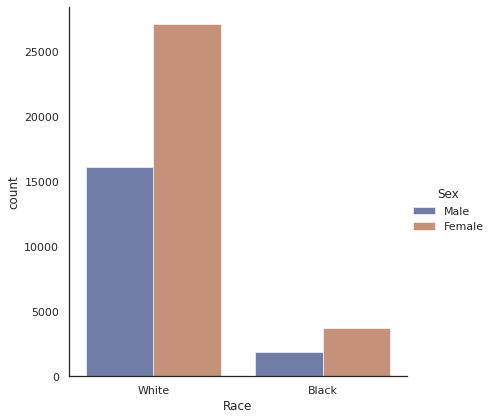

In [8]:
g = sns.catplot(
    data=summmary_demographics, kind="bar",
    x="Race", y="count", hue="Sex", palette="dark", alpha=.6, height=6
)

In [9]:
outcome_columns = ['log_cost_t', 'gagne_sum_t']

## Measure Biases

1. Install requirements.

These requirements are publicly sourced such as 

```{bash}
sklearn
torch
scipy
torchvision
pandas
```

```{bash}
pip install requirements.txt
```
And are also privately sourced: mainly cnnMCSE. 

In [10]:
from cnnMCSE.predict import measure_disparity_custom

2. Setup config file in a config.yaml file.

```{yaml}
# Contains path to data. Contains independent variables, demographics, and outcome variables. 
dataset_path: ./preprocssed_demo.tsv 

# Name of demographics variable in dataset.
demographics_cols: demographics

# Name of outcome variable in data_path
outcome_cols: log_cost_t, gagne_sum_t  

# Name of columns to exclude when calculating AEq (irrelevant outcome columns).  
exclude_cols: log_cost_avoidable_t 

# Output directory for AEq analyses. 
root_dir: ./measure   

# Model type. Can select more complex models for more complex tasks. 
models: A3,FCN 

# Input Dimension
input_dim: 149 

# Hidden dimension hyper-parameter
hidden_size: 64 

# Use this function for more complicated image-based models like ResNet or AlexNet. 
zoo_models: None 

# Max sample size to calculate from. Usually only require 128-512 samples. 
max_sample_size: 5000 

# Number of bootstraps. 30-50 is typically recommended for resolution at 5000 samples. 
n_bootstraps: 5 

# Batch size. Increase in larger computers. Built with GPU-support, and multi-threaded processing.
batch_size: 1 
```

In [12]:
%%time
measure_disparity_custom(
    dataset_path = "./preprocssed_demo_demographics.tsv",
    demographics_cols = "demographics",
    outcome_cols = "log_cost_t,gagne_sum_t",
    exclude_cols = "log_cost_avoidable_t,demographics",
    models = "A3,FCN",
    n_bootstraps = 5,
    batch_size = 1,
    start_seed = 42,
    input_dim = 149,
    hidden_size = 64,
    max_sample_size = 5000,
    root_dir = "./measure"
)

CPU times: user 25min 16s, sys: 1.79 s, total: 25min 18s
Wall time: 7min 1s


In [3]:
metadata = pd.read_csv("./measure/metadata.tsv", sep="\t")
def assign_risk(value):
    if(value == 1): return "High-Risk"
    else: return "Low-Risk"
    
metadata['risk'] = metadata['label'].apply(assign_risk)
metadata.drop(['dataset', 'label', 'subset'], axis=1, inplace=True)
metadata

,aeq_mean,aeq_sd,demographics,outcome,risk
0,7.0,0.016667,Black,gagne_sum_t,Low-Risk
1,7.2,0.029814,Black,gagne_sum_t,High-Risk
2,6.2,0.007454,Black,log_cost_t,Low-Risk
3,7.2,0.018257,Black,log_cost_t,High-Risk
4,7.4,0.014907,White,gagne_sum_t,Low-Risk
5,7.2,0.029814,White,gagne_sum_t,High-Risk
6,6.6,0.022361,White,log_cost_t,Low-Risk
7,6.8,0.007454,White,log_cost_t,High-Risk
8,7.4,0.019003,joint,gagne_sum_t,Low-Risk
9,6.4,0.014907,joint,gagne_sum_t,High-Risk


## Interpretation of AEq.

Healthcare-cost allocation is based on the predictions of the high-risk group. Thus, lets look at the high-risk group, which we have colored a light blue in the plot below. 
Our objective is to (a) determine which outcome we should use, and (b) which data we need to additionally collect and train on in order to provide optimal performance on Black patients. We want to identify and establish both predictive and social biases that are present in the dataset. 

Lets look at the **log_cost_t** metric first. 
- We first notice that the AEq value for high-risk Black patients are significant larger than those for high-risk white patients. This indicates that there is some form of predictive bias because a higher AEq value means that generalizability will be worse if we use this outcome. 
- Second, we notice that the joint AEq value is higher than the AEq value for either White or Black patients. This means that White and Black patients represent different distributions. This is a form of social bias because it means that despite the fact that both of these patients are supposed to be "high risk" they are not represented equitably in the underlying dataset. From Obermeiyer, we know that this is true because Black patients that are categorized at high risk have far more commoribidites than their White counterparts. 


Second, lets look at the **gagne_sum_t** metric. 
- We first notice that the AEq of White and Black patients are equal. This means that in terms of generalizability, both Black and White patients will have relatively equal generalizability because AEq is a measure of generalizability. Residual biases would only occur with labeling problems because sample distributions are invariant to labels. 
- Second, we notice that the joint AEq is lower than the AEq of both White and Black patients. This means that both groups of patients are derived from a similar distribution, this means that we've mitigated the complexity bias created by using cost as a label. Both groups of patients are represented equitably in this distribution, and thus the social bias has been mitigated. 
- Third, training on both subsets will improve the model rather than harm the model. Because the joint AEq is smaller than the AEq for each of the subsets, the generalizability for a dataset consisting of both Black and White patients should be better than a dataset consisting of only Black or White patients.

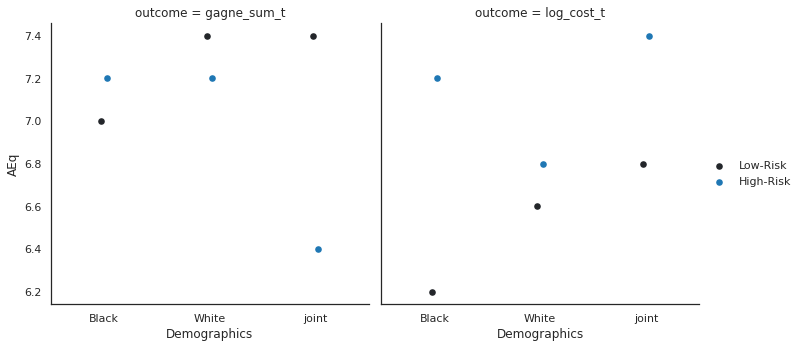

In [23]:
g = sns.FacetGrid(
    data=metadata,
    col="outcome",
    aspect=16/16, height=5
)
g.map(
    sns.pointplot, 'demographics', 'aeq_mean', hue='risk',
    data=metadata, dodge=True, join=False, scale=0.75, errorbar=0.03/5*2
).set_axis_labels(y_var="AEq", x_var="Demographics").add_legend()
plt.show()

## Mitigate Biases.

Here we show that careful interpretation of the AEq values can improve generalization performance on a held out test dataset.


The two main conclusions that we have arrived at from our AEq analysis are

1. **First**, we should use gagne_sum_t, a measure of comorbidites over the log_cost_t, when determining risk. This will mitigate some of the social biases generated by using cost as the outcome variable. 

2. **Second**, training on a dataset consisting of both Black and White patients, increasing diversity, is better than training on only Black patients.



In [14]:
from cnnMCSE.predict import mitigate_disparity_custom

In [2]:
%time
df, preds_df = mitigate_disparity_custom(
    dataset_path='./preprocssed_demo_demographics.tsv',
    demographics_cols = "demographics",
    outcome_cols = "log_cost_t,gagne_sum_t",
    exclude_cols = "log_cost_avoidable_t,demographics",
    root_dir = "./mitigate",
    models = "A3,FCN",
    input_dim = 149,
    hidden_size = 64,
    start_seed = 42,
    zoo_models = None,
    max_sample_size=128,
    sampler_mode=None,
    frequency=True,
    stratified=True,
    n_bootstraps=2,
    config=None,
    log_scale=2, 
    min_sample_size=16, 
    absolute_scale=False,
    batch_size=1,
    shuffle=True,
    num_workers=4,
    current_dataset="custom",
    metric_type="sAUC",
    n_classes=2
)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs


In [6]:
df = pd.read_csv("./mitigate/mitigated.tsv", sep="\t")

In [7]:
from cnnMCSE.utils.helpers import post_process_estimands

Here we see that the AUC improves from 0.69 to 0.80. This is an improvement of almost 0.10 just based on selection of the an equitable labelling and collection of the data!

In [8]:
demographic = "Black"
n_bootstraps = 2
outcome_pre = "log_cost_t"
outcome_post = "gagne_sum_t"
demographic_pre = "Black"
demographic_post = "joint"


intervention_df = post_process_estimands(df, demographic, n_bootstraps, outcome_pre, outcome_post, demographic_pre, demographic_post)
intervention_df

,auc_mean,auc_se,intervention
,,,
1,0.703322,0.000431,Pre
2,0.812991,0.001149,Post


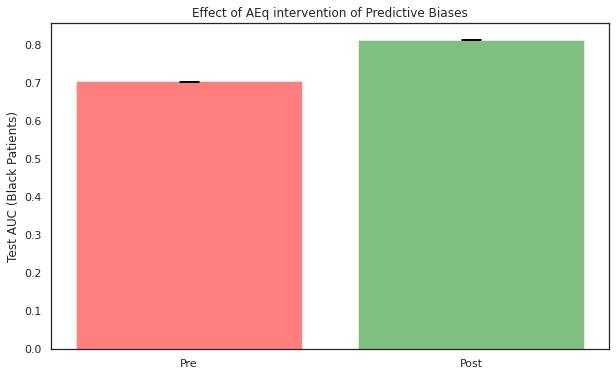

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(intervention_df['intervention'], 
       intervention_df['auc_mean'], 
       yerr=2*intervention_df['auc_se'], 
       align='center', 
       alpha=0.5, ecolor='black', capsize=10,
        color=['red', 'green'])
ax.set_ylabel('Test AUC (Black Patients)')
ax.set_title('Effect of AEq intervention of Predictive Biases')
plt.show()

## Evaluating on other fairness metrics.

While we previously evaluated on AUC, here, we show that AEq measures and mitigation steps are robust to other fairness metrics! 

Namely, we look at false negative rate and precision.

1. **False Negative Rate**: False negative rate is determined as the ratio of false negatives to all positives $\frac{FN}{FN+TP}$. We want a lower false negative rate because if we have more false negatives, we would be under-diagnosing a significant portion of our population. Differences in false negative rates can result in under-allocation of resources for individuals who need it. 

2. **Precision**: Precision is defined as $\frac{TP}{TP + FP}$. We look at precision because in an ideal setting, we would want our precision to go up for under-represented groups because we want to have an equitable ratio of true positives to false positives to allow for maximally efficient resource allocation. 

In [4]:
preds_df = pd.read_csv("./mitigate/predictions.tsv", sep="\t")

In [5]:
from cnnMCSE.metrics import evaluate_fairness

In [6]:
num_classes = 2
demographic = "Black"
n_bootstraps = 2
outcome_pre = "log_cost_t"
outcome_post = "gagne_sum_t"
demographic_pre = "Black"
demographic_post = "joint"

fairness_df = evaluate_fairness(preds_df, num_classes, demographic, outcome_pre, outcome_post, demographic_pre, demographic_post)
fairness_df.head()

,Intervention,precision,fnr
0,Post,0.667568,0.005369
1,Pre,0.500000,0.867213


Here we see that precision increases but the false negative rate decreases! 

This is important because it means that 

1. We have **reduced under-diagnosis bias**. A lower false negative rate implies that we are catching more patients that need to be allocated resources. 
2. We are **optimally allocating resources**. A higher precision means that we are improving resource allocation for the patients we catch.

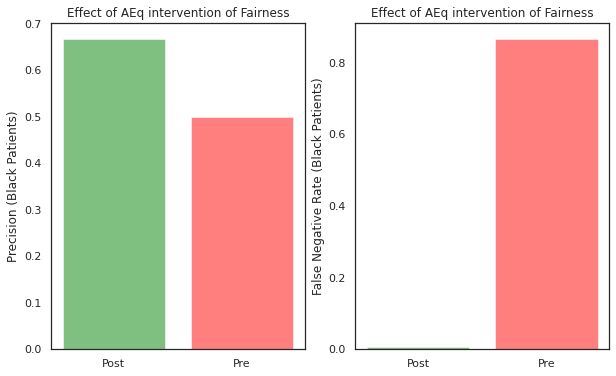

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].bar(fairness_df['Intervention'], 
       fairness_df['precision'],
       align='center', 
       alpha=0.5, ecolor='black', capsize=10,
        color=['green', 'red'])
ax[0].set_ylabel('Precision (Black Patients)')
ax[0].set_title('Effect of AEq intervention of Fairness')

ax[1].bar(fairness_df['Intervention'], 
       fairness_df['fnr'],
       align='center', 
       alpha=0.5, ecolor='black', capsize=10,
        color=['green', 'red'])
ax[1].set_ylabel('False Negative Rate (Black Patients)')
ax[1].set_title('Effect of AEq intervention of Fairness')
plt.show()

## Discussion

Here, we have presented a very elementary demo of how our method works. While we only show a demonstration of the method on simple linear models, our work **also shows improvements with very complex models** such as deep convolutional neural networks. Second, our work extends to **intersectional identities.**

In summary, traditional approaches to the issue of algorithmic bias rely on post-hoc approaches which fail to address manifestations of bias at the level of datasets used to train algorithms. We present AEq, a novel, deep-learning based metric that may be valuable for disentangling and quantifying various manifestations of bias at the dataset level. We show how it can be used to suggest specific, effective mitigation measures. Finally, we demonstrate its robustness by applying it to to produce mitigation steps and measuring its effectiveness with respect to a range of traditional fairness metrics.

